In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# supervised
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# unsupervised 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [4]:
random_state = 42

In [5]:
data = pd.read_csv("players_21.csv")
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,24-06-87,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,01-07-04,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,05-02-85,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,10-07-18,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,07-01-93,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,16-07-14,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,21-08-88,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,01-07-14,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,05-02-

Dropping useless columns and makeing some data cleaning

In [6]:
useless_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position',
                  'loaned_from','nation_jersey_number', 'player_tags', 'player_traits']
data = data.drop(useless_column, axis = 1)
data

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,138400000.0,CAM,10.0,01-07-04,2021.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,75900000.0,LS,7.0,10-07-18,2022.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,159400000.0,GK,13.0,16-07-14,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,132000000.0,ST,9.0,01-07-14,2023.0,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,166500000.0,LW,10.0,03-08-17,2022.0,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,40000,500,CM,Right,1,2,2,Medium/Medium,91000.0,SUB,28.0,01-01-20,2024.0,63.0,37.0,50.0,47.0,41.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,45,37,43,55,27,44

In [7]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

club_name                 225
league_name               225
league_rank               225
release_clause_eur        995
team_position             225
team_jersey_number        225
joined                    983
contract_valid_until      225
pace                     2083
shooting                 2083
passing                  2083
dribbling                2083
defending                2083
physic                   2083
gk_diving               16861
gk_handling             16861
gk_kicking              16861
gk_reflexes             16861
gk_speed                16861
gk_positioning          16861
defending_marking       18944
dtype: int64

In [8]:
columns = ['dribbling','defending','physic','passing','shooting','pace']
data[columns].isnull().sum()

dribbling    2083
defending    2083
physic       2083
passing      2083
shooting     2083
pace         2083
dtype: int64

In [9]:
for col in columns:
    data[col] = data[col].fillna(data[col].median())
data = data.fillna(0)

In [10]:
data.isnull().sum().sum()

0

In [11]:
data['BMI'] = data['weight_kg'] / (data['height_cm'] / 100) ** 2

In [12]:
data['best_position'] = data['player_positions'].str.split(',').str[0]

In [13]:
data_player = data[data['best_position']!= 'GK'].copy()
data_player

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI,best_position
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,138400000.0,CAM,10.0,01-07-04,2021.0,85.0,92.0,91.0,95.0,38.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,0.0,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,24.913495,RW
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,75900000.0,LS,7.0,10-07-18,2022.0,89.0,93.0,81.0,89.0,35.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,0.0,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,23.735308,ST
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,132000000.0,ST,9.0,01-07-14,2023.0,78.0,91.0,78.0,85.0,43.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,0.0,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,23.629490,ST
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,166500000.0,LW,10.0,03-08-17,2022.0,91.0,85.0,86.0,94.0,36.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,0.0,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,22.204082,LW
5,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,87000000,370000,"CAM, CM",Right,4,5,4,High/High,161000000.0,RCM,17.0,30-08-15,2023.0,76.0,86.0,93.0,88.0,64.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,0.0,65,53,15,13,5,10,13,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21.366869,CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,40000,500,CM,Right,1,2,2,Medium/Medium,91000.

In [14]:
pos = {
    'ST': 'Stricker', 'CF': 'Stricker', 
    'LW': 'Stricker_wing', 'RW': 'Stricker_wing', 
    'CM': 'Midfielder', 'CAM': 'Midfielder', 'CDM': 'Midfielder', 
    'LM': 'Midfielder_Side', 'RM': 'Midfielder_Side', 
    'CB': 'Defender',
    'LB': 'Defender_Side', 'RB': 'Defender_Side', 
    'LWB': 'Defender_Wing', 'RWB': 'Defender_Wing',
}

pos_type = {
    'Stricker': 'Forward', 'Stricker_wing': 'Forward',
    'Midfielder': 'Midfielder', 'Midfielder_Side': 'Midfielder', 
    'Defender': 'Defender', 'Defender_Side': 'Defender', 'Defender_Wing': 'Defender'
}

In [15]:
data_player['pos_name'] = data_player['best_position'].map(pos)
data_player['pos_type'] = data_player['pos_name'].map(pos_type)
data_player

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI,best_position,pos_name,pos_type
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,138400000.0,CAM,10.0,01-07-04,2021.0,85.0,92.0,91.0,95.0,38.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,0.0,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,24.913495,RW,Stricker_wing,Forward
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,75900000.0,LS,7.0,10-07-18,2022.0,89.0,93.0,81.0,89.0,35.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,0.0,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,23.735308,ST,Stricker,Forward
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,132000000.0,ST,9.0,01-07-14,2023.0,78.0,91.0,78.0,85.0,43.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,0.0,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,23.629490,ST,Stricker,Forward
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,166500000.0,LW,10.0,03-08-17,2022.0,91.0,85.0,86.0,94.0,36.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,0.0,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,22.204082,LW,Stricker_wing,Forward
5,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,87000000,370000,"CAM, CM",Right,4,5,4,High/High,161000000.0,RCM,17.0,30-08-15,2023.0,76.0,86.0,93.0,88.0,64.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,0.0,65,53,15,13,5,10,13,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21.366869,CAM,Midfielder,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893

Doing exploratory data analysis on the data

In [16]:
data_player['best_position'].value_counts()

CB     3252
ST     2645
CM     2241
CDM    1514
LB     1402
RB     1363
CAM    1148
LM     1069
RM     1065
RW      438
LW      420
CF      115
LWB     100
RWB      88
Name: best_position, dtype: int64

<AxesSubplot:xlabel='best_position', ylabel='count'>

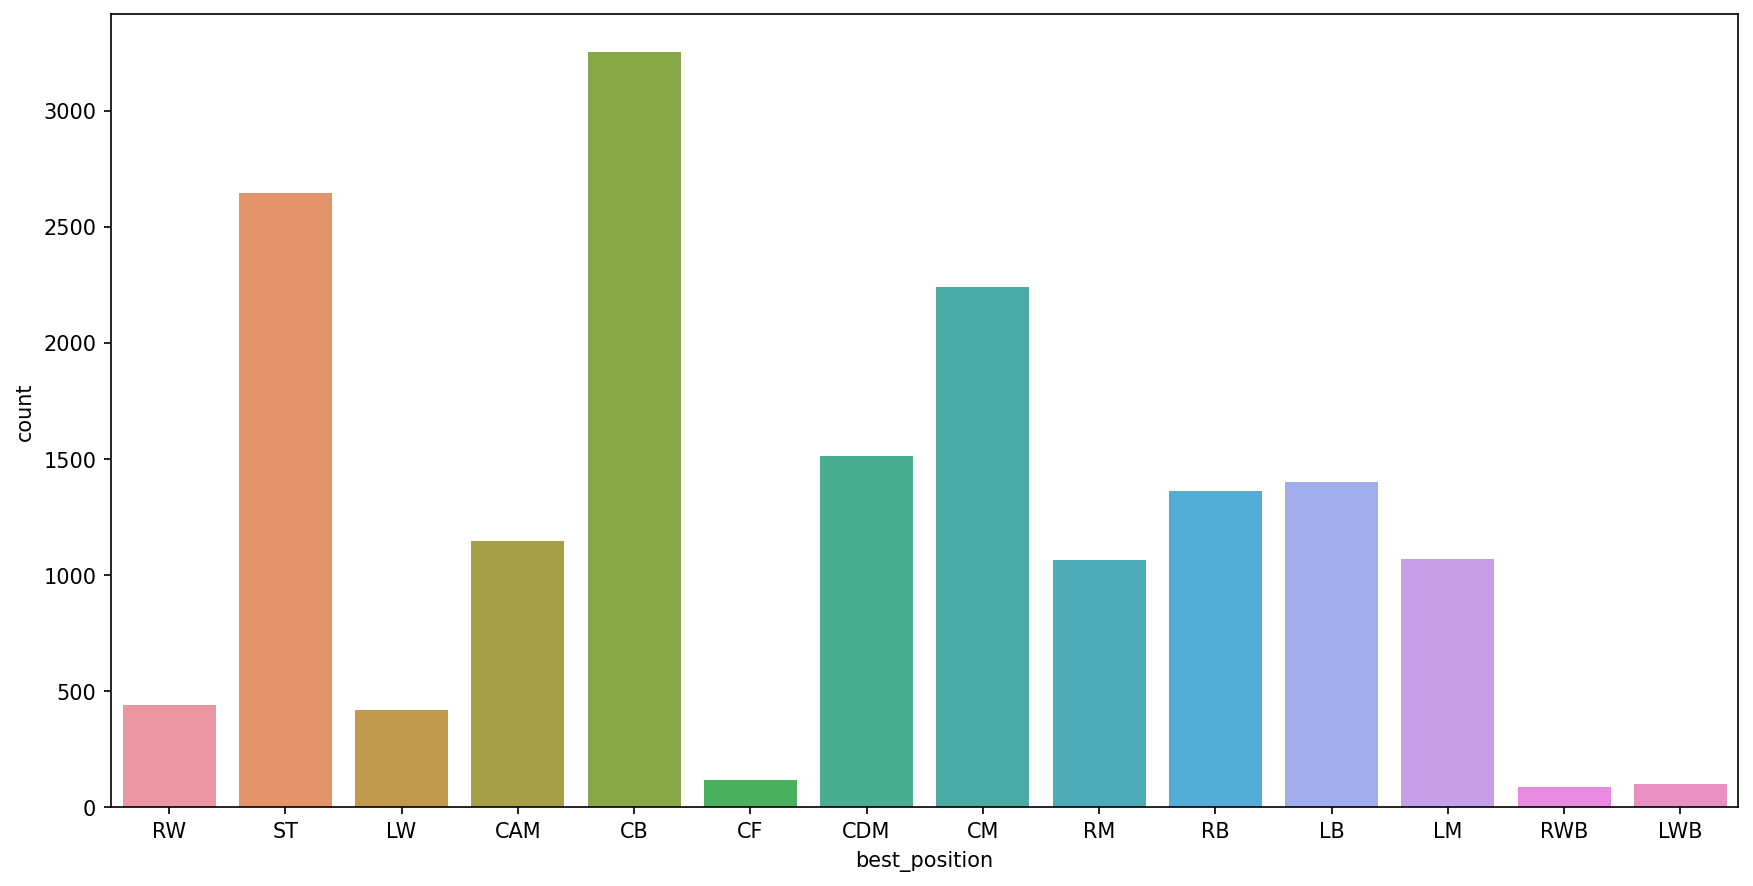

In [17]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x = 'best_position',data = data_player)

In [18]:
data_player['pos_name'].value_counts()

Midfielder         4903
Defender           3252
Defender_Side      2765
Stricker           2760
Midfielder_Side    2134
Stricker_wing       858
Defender_Wing       188
Name: pos_name, dtype: int64

<AxesSubplot:xlabel='pos_name', ylabel='count'>

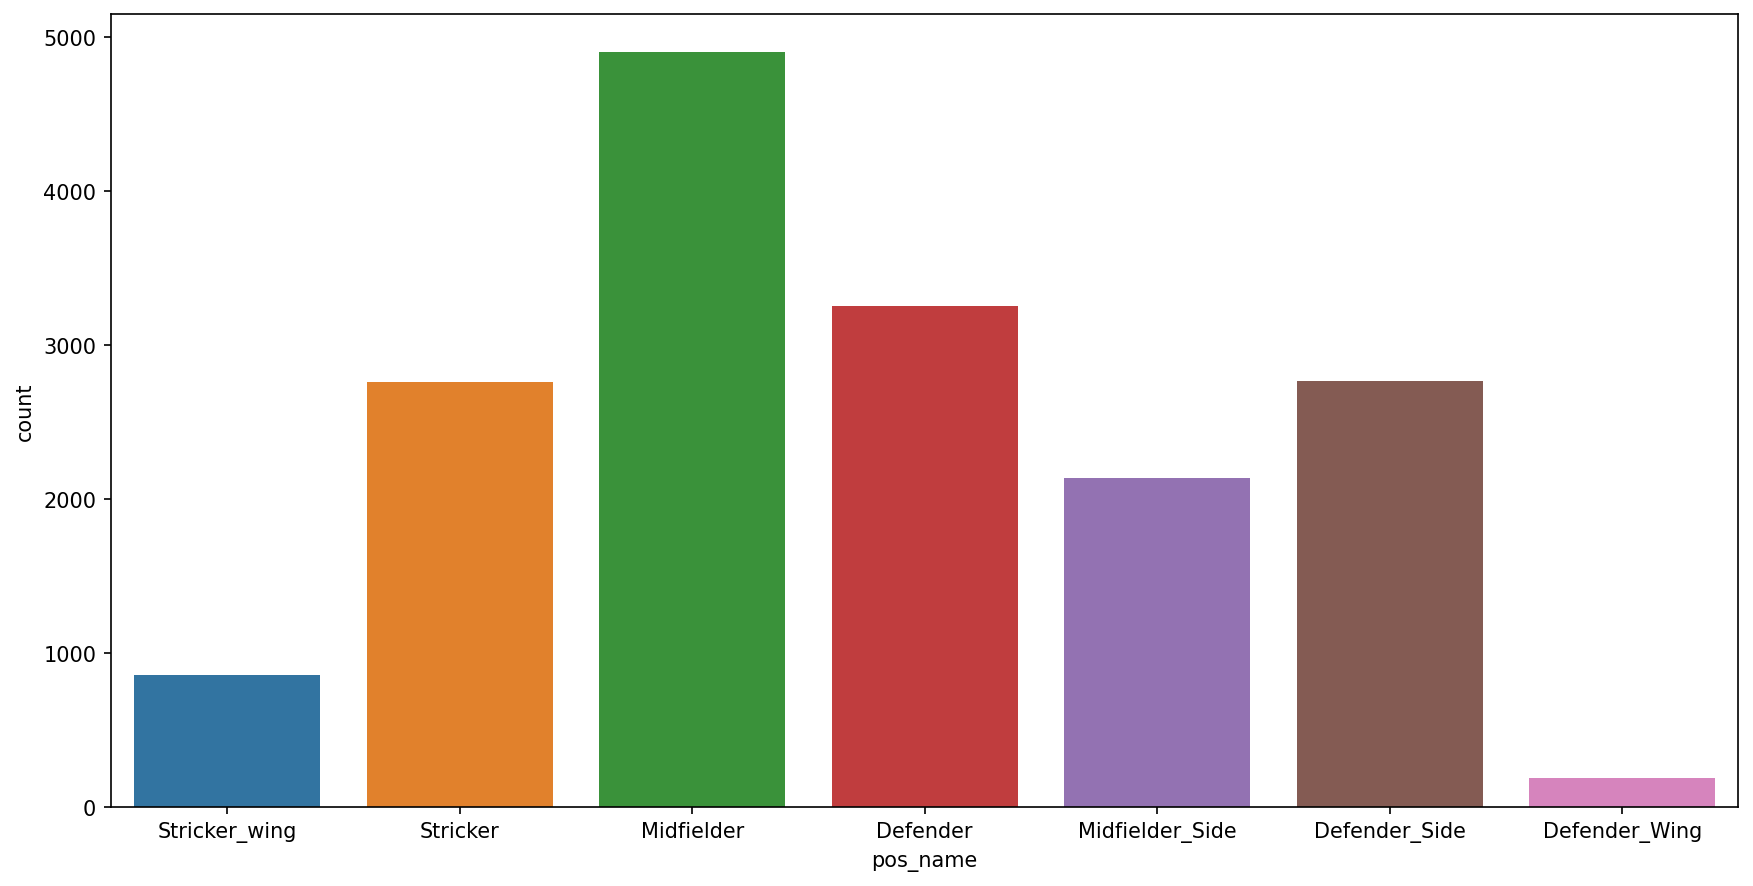

In [19]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x = 'pos_name',data = data_player)

In [20]:
data_player['pos_type'].value_counts()

Midfielder    7037
Defender      6205
Forward       3618
Name: pos_type, dtype: int64

<AxesSubplot:xlabel='pos_type', ylabel='count'>

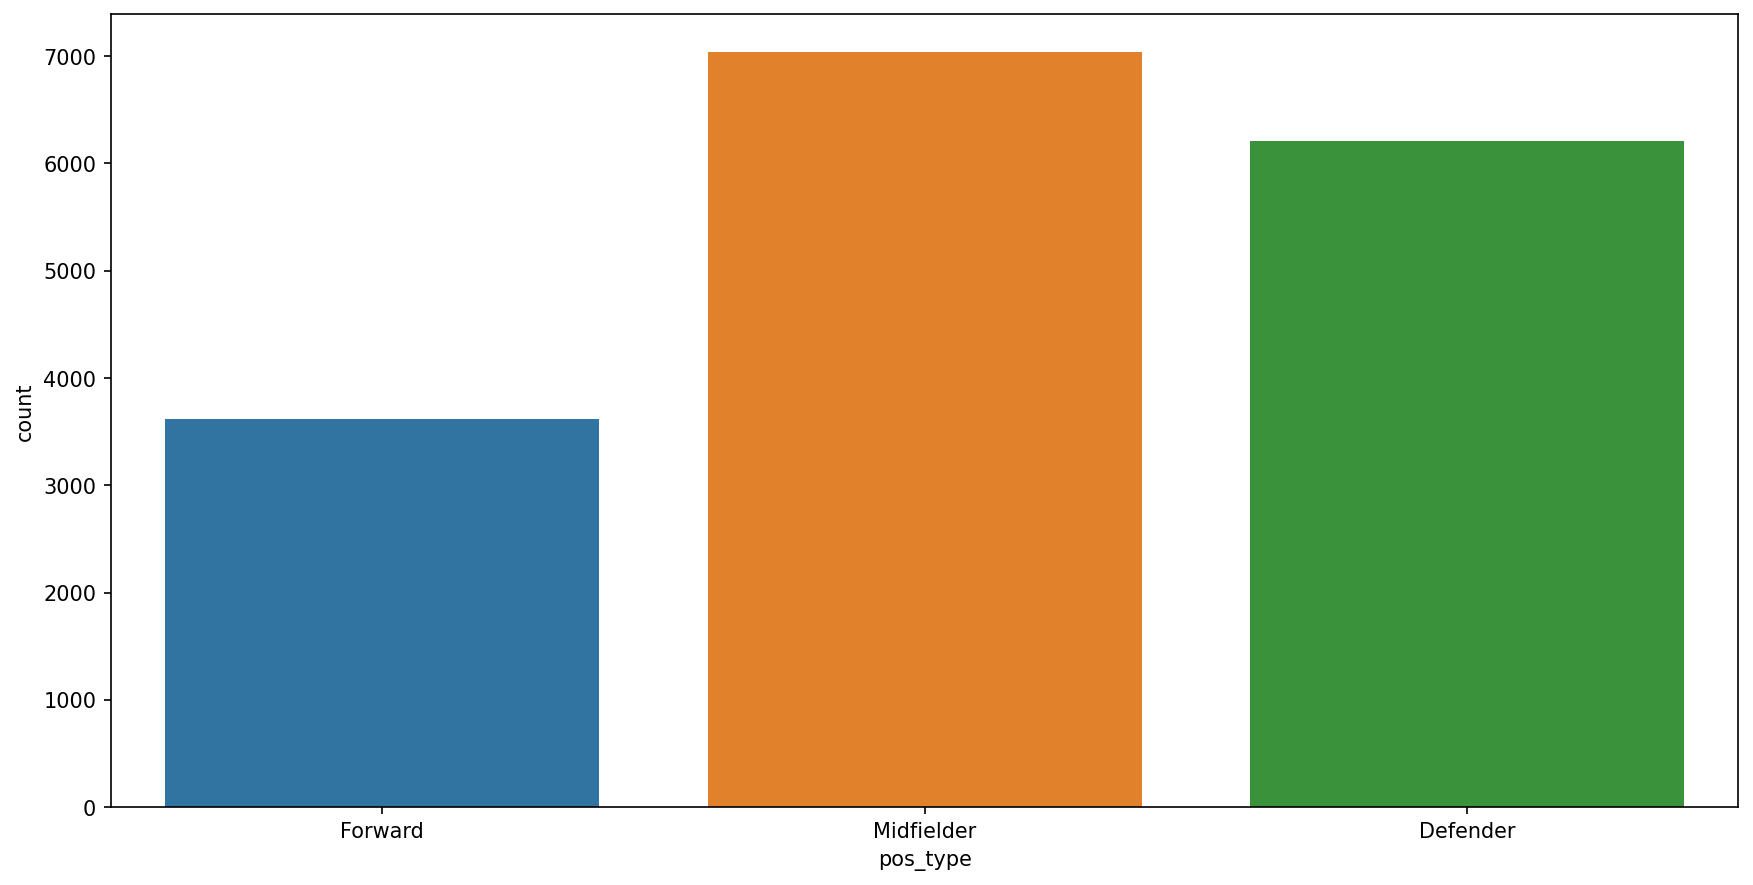

In [21]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x = 'pos_type',data = data_player)

<AxesSubplot:xlabel='pos_type', ylabel='passing'>

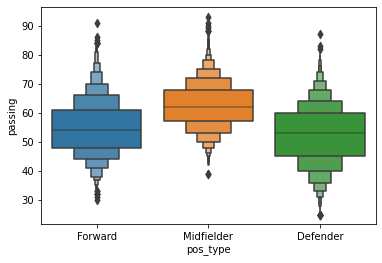

In [22]:
sns.boxenplot(data_player['pos_type'], data_player['passing'])

<AxesSubplot:xlabel='pos_type', ylabel='shooting'>

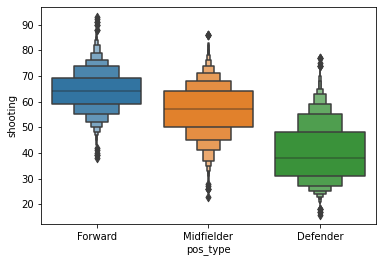

In [23]:
sns.boxenplot(data_player['pos_type'], data_player['shooting'])

<AxesSubplot:xlabel='pos_type', ylabel='dribbling'>

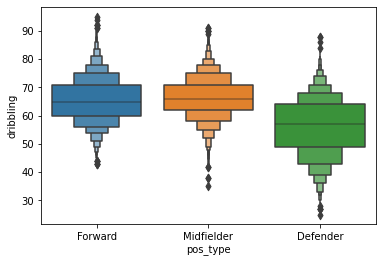

In [24]:
sns.boxenplot(data_player['pos_type'], data_player['dribbling'])

<AxesSubplot:xlabel='pos_type', ylabel='defending'>

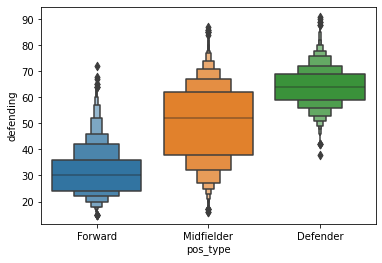

In [25]:
sns.boxenplot(data_player['pos_type'], data_player['defending'])

<AxesSubplot:xlabel='pos_type', ylabel='physic'>

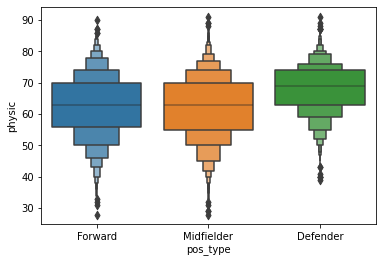

In [26]:
sns.boxenplot(data_player['pos_type'], data_player['physic'])

<AxesSubplot:xlabel='pos_type', ylabel='BMI'>

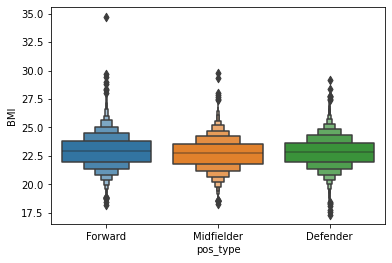

In [27]:
sns.boxenplot(data_player['pos_type'], data_player['BMI'])

<AxesSubplot:xlabel='pos_type', ylabel='height_cm'>

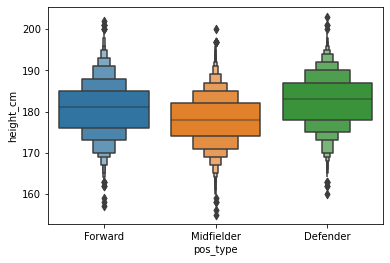

In [28]:
sns.boxenplot(data_player['pos_type'], data_player['height_cm'])

<AxesSubplot:xlabel='pos_type', ylabel='weight_kg'>

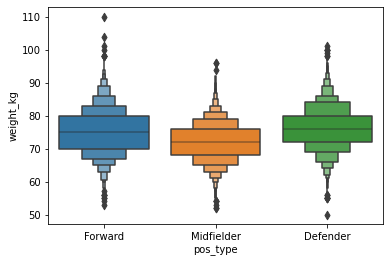

In [29]:
sns.boxenplot(data_player['pos_type'], data_player['weight_kg'])

In [30]:
attributes_1 = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'BMI']
attributes_2 = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'BMI',
        'attacking_crossing','attacking_finishing','attacking_heading_accuracy',
        'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
        'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
        'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
        'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',
        'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
        'mentality_penalties','mentality_composure','defending_standing_tackle',
        'defending_sliding_tackle']

In [31]:
data_player_7 = data_player[attributes_1].div(data_player["overall"], axis=0)
data_player_35 = data_player[attributes_2].div(data_player["overall"], axis=0)
all_pos = ['Stricker','Stricker_wing','Midfielder','Midfielder_Side','Defender','Defender_Side','Defender_Wing']

# Supervised

After exploring and cleaning the data set, i will implement Decisional Tree algorithm and K-Nearest Neighbor algorithms for the supervised part to predict players position based on their stats(using 2 groups of stats).

In [32]:
def test_model(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print()
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    

def matrix(y_test, y_pred, label):
    conf = confusion_matrix(y_test, y_pred, labels = label)
    row_sums = conf.astype(np.float).sum(axis=1)
    conf = conf/row_sums[:, np.newaxis]
    conf = pd.DataFrame(conf, columns = label, index = label)
    plt.figure(figsize=(16,9))
    sns.heatmap(conf, annot=True, cmap='Blues')

In [33]:
def knn(X_train, X_test, y_train, y_test, pos_list):
    error_rate= []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    best_n = error_rate.index(min(error_rate))+1
    print("Best n_neighbors:", best_n)
    
    plt.figure(figsize = (10,6))
    plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
    plt.title('Error Rate vs K')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    
    knn = KNeighborsClassifier(n_neighbors = best_n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    test_model(y_test,y_pred)
    matrix(y_test, y_pred, all_pos)
    
    pos_list.append(accuracy_score(y_test,y_pred))

In [34]:
def tree(X_train, X_test, y_train, y_test, pos_list):
    model_dtc=DecisionTreeClassifier()
    parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    model_dtc_grid = GridSearchCV(model_dtc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
    print(model_dtc_grid.best_params_)
    print('Decision Tree Classifier score:',model_dtc_grid.best_score_)
    
    dtc = DecisionTreeClassifier(criterion=model_dtc_grid.best_params_['criterion'], 
                                 max_depth=model_dtc_grid.best_params_['max_depth'], random_state = random_state)
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_test)
    test_model(y_test,y_pred)
    matrix(y_test, y_pred, all_pos)
    
    pos_list.append(accuracy_score(y_test,y_pred))

In [35]:
#KNN & Tree lists

pos_name_tree = []
pos_name_knn =[]
pos_type_tree = []
pos_type_knn = []

Basic group of stats with 7 labels

In [36]:
X = data_player_7
y = data_player['pos_name']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 8}
Decision Tree Classifier score: 0.7267933385098975
                 precision    recall  f1-score   support

       Defender       0.84      0.87      0.86       670
  Defender_Side       0.71      0.74      0.72       555
  Defender_Wing       0.00      0.00      0.00        44
     Midfielder       0.71      0.75      0.73       988
Midfielder_Side       0.55      0.61      0.58       431
       Stricker       0.82      0.86      0.84       519
  Stricker_wing       0.41      0.08      0.14       165

       accuracy                           0.73      3372
      macro avg       0.58      0.56      0.55      3372
   weighted avg       0.71      0.73      0.71      3372


Accuracy score:  0.7283511269276394


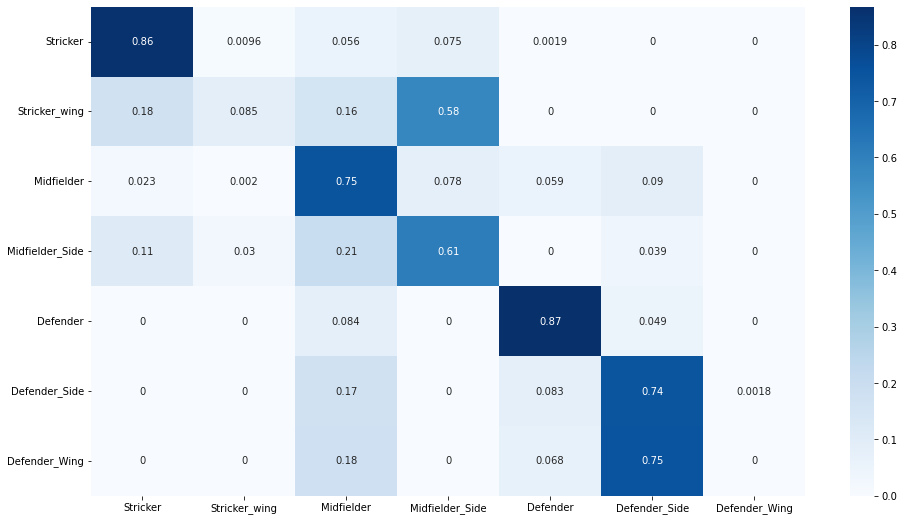

In [38]:
tree(X_train, X_test, y_train, y_test, pos_name_tree)

Best n_neighbors: 19
                 precision    recall  f1-score   support

       Defender       0.87      0.88      0.87       670
  Defender_Side       0.72      0.79      0.75       555
  Defender_Wing       0.00      0.00      0.00        44
     Midfielder       0.77      0.79      0.78       988
Midfielder_Side       0.58      0.67      0.62       431
       Stricker       0.86      0.87      0.86       519
  Stricker_wing       0.61      0.13      0.22       165

       accuracy                           0.76      3372
      macro avg       0.63      0.59      0.59      3372
   weighted avg       0.75      0.76      0.75      3372


Accuracy score:  0.7618623962040332


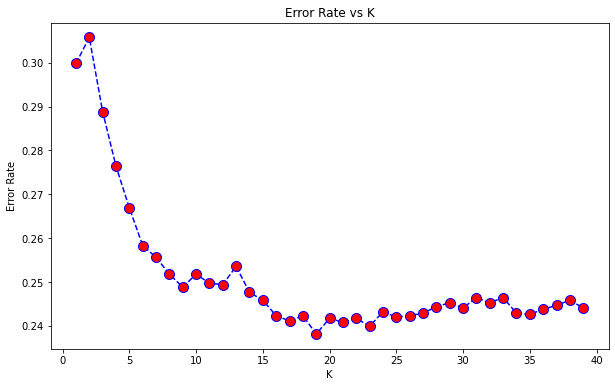

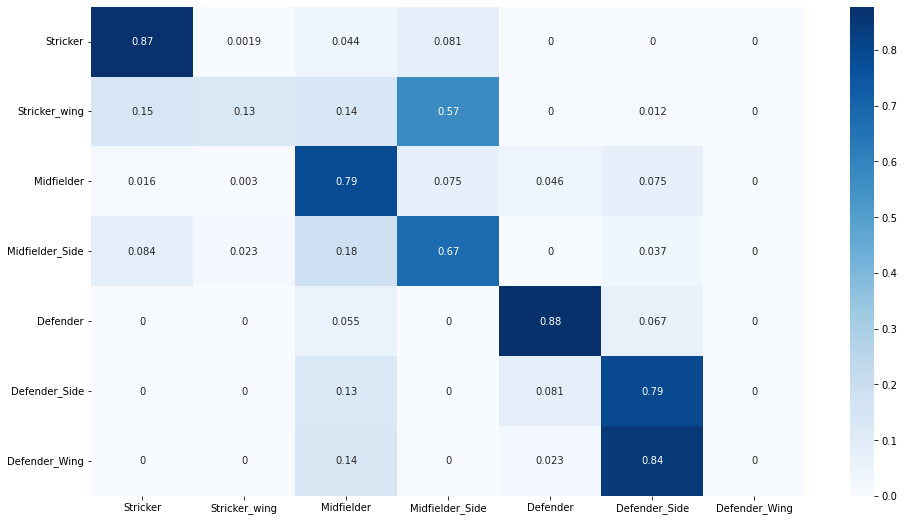

In [39]:
knn(X_train, X_test, y_train, y_test, pos_name_knn)

Large group of stats with 7 labels

In [40]:
X = data_player_35
y = data_player['pos_name']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 8}
Decision Tree Classifier score: 0.7859573967308457
                 precision    recall  f1-score   support

       Defender       0.88      0.89      0.89       670
  Defender_Side       0.80      0.85      0.82       555
  Defender_Wing       0.00      0.00      0.00        44
     Midfielder       0.82      0.84      0.83       988
Midfielder_Side       0.57      0.75      0.65       431
       Stricker       0.91      0.85      0.88       519
  Stricker_wing       0.40      0.07      0.12       165

       accuracy                           0.80      3372
      macro avg       0.63      0.61      0.60      3372
   weighted avg       0.78      0.80      0.78      3372


Accuracy score:  0.7950771055753262


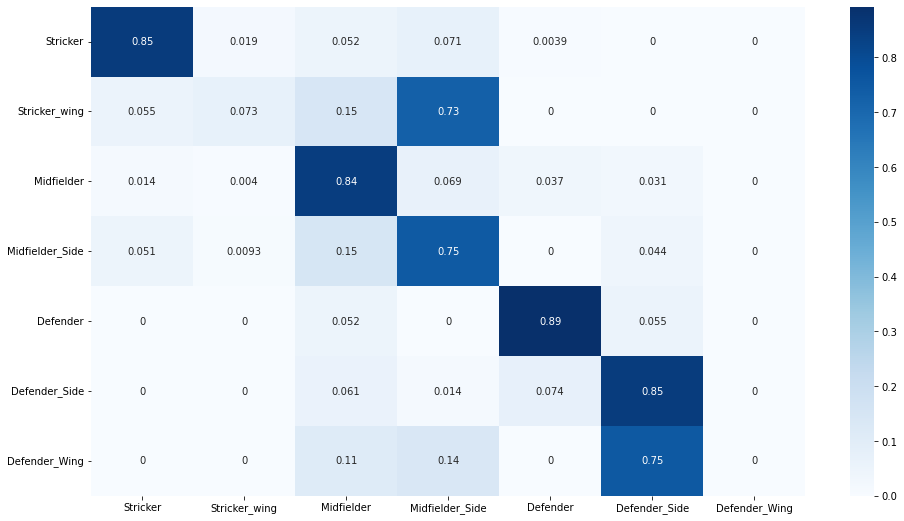

In [42]:
tree(X_train, X_test, y_train, y_test, pos_name_tree)

Best n_neighbors: 23
                 precision    recall  f1-score   support

       Defender       0.93      0.88      0.91       670
  Defender_Side       0.80      0.89      0.84       555
  Defender_Wing       0.00      0.00      0.00        44
     Midfielder       0.83      0.89      0.86       988
Midfielder_Side       0.62      0.70      0.66       431
       Stricker       0.88      0.89      0.88       519
  Stricker_wing       0.58      0.13      0.21       165

       accuracy                           0.82      3372
      macro avg       0.66      0.63      0.62      3372
   weighted avg       0.80      0.82      0.80      3372


Accuracy score:  0.816429418742586


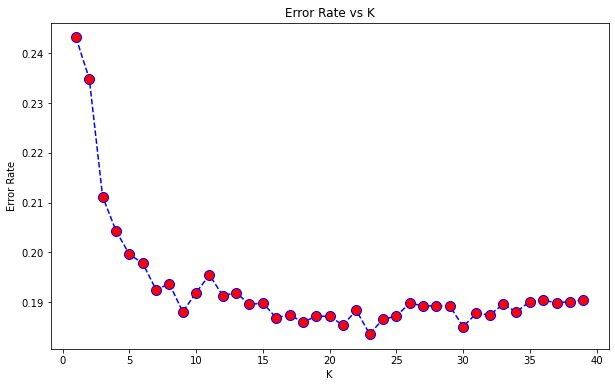

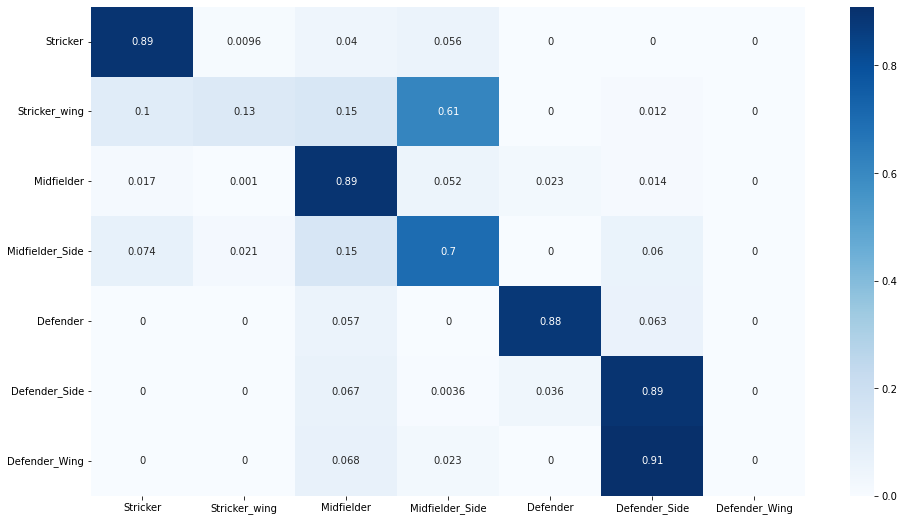

In [43]:
knn(X_train, X_test, y_train, y_test, pos_name_knn)

Basic group of stats with 3 labels

In [44]:
all_pos = ['Forward','Midfielder','Defender']

In [45]:
X = data_player_7
y = data_player['pos_type']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 7}
Decision Tree Classifier score: 0.8253266514595932
              precision    recall  f1-score   support

    Defender       0.88      0.84      0.86      1269
     Forward       0.84      0.74      0.79       684
  Midfielder       0.76      0.83      0.80      1419

    accuracy                           0.82      3372
   macro avg       0.83      0.81      0.82      3372
weighted avg       0.82      0.82      0.82      3372


Accuracy score:  0.8190984578884934


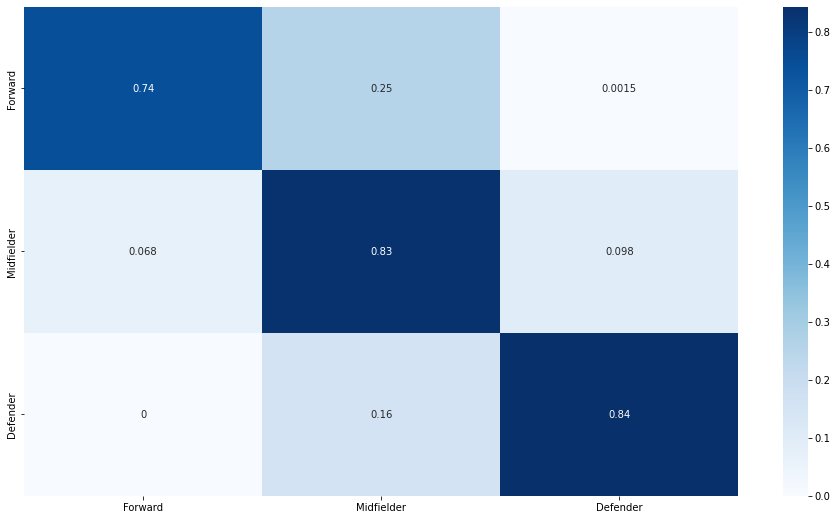

In [47]:
tree(X_train, X_test, y_train, y_test, pos_type_tree)

Best n_neighbors: 33
              precision    recall  f1-score   support

    Defender       0.88      0.91      0.90      1269
     Forward       0.89      0.75      0.81       684
  Midfielder       0.81      0.85      0.83      1419

    accuracy                           0.85      3372
   macro avg       0.86      0.84      0.84      3372
weighted avg       0.85      0.85      0.85      3372


Accuracy score:  0.8502372479240806


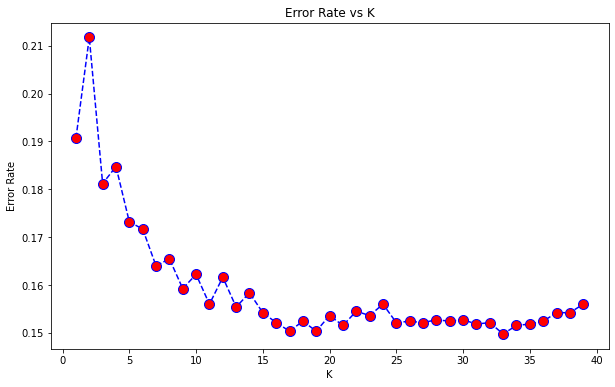

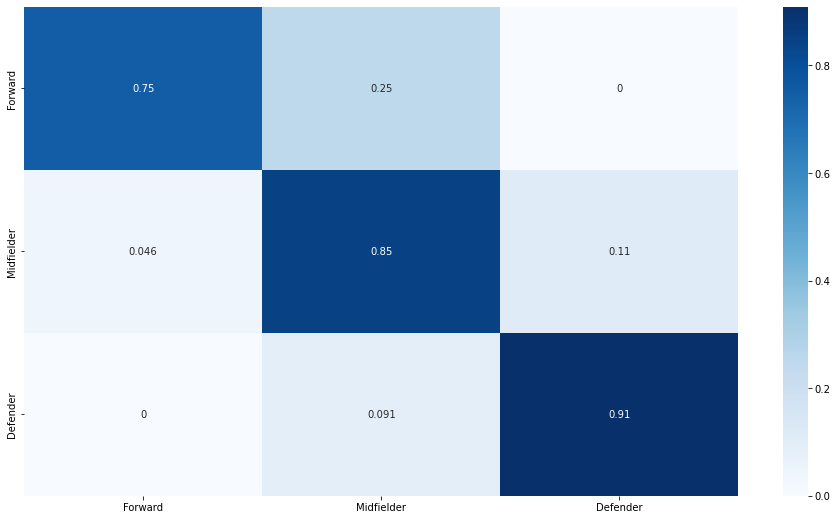

In [48]:
knn(X_train, X_test, y_train, y_test, pos_type_knn)

Large group of stats with 3 labels

In [49]:
X = data_player_35
y = data_player['pos_type']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 7}
Decision Tree Classifier score: 0.8635079727152546
              precision    recall  f1-score   support

    Defender       0.93      0.92      0.92      1269
     Forward       0.85      0.75      0.80       684
  Midfielder       0.82      0.87      0.85      1419

    accuracy                           0.87      3372
   macro avg       0.87      0.85      0.86      3372
weighted avg       0.87      0.87      0.87      3372


Accuracy score:  0.8668446026097272


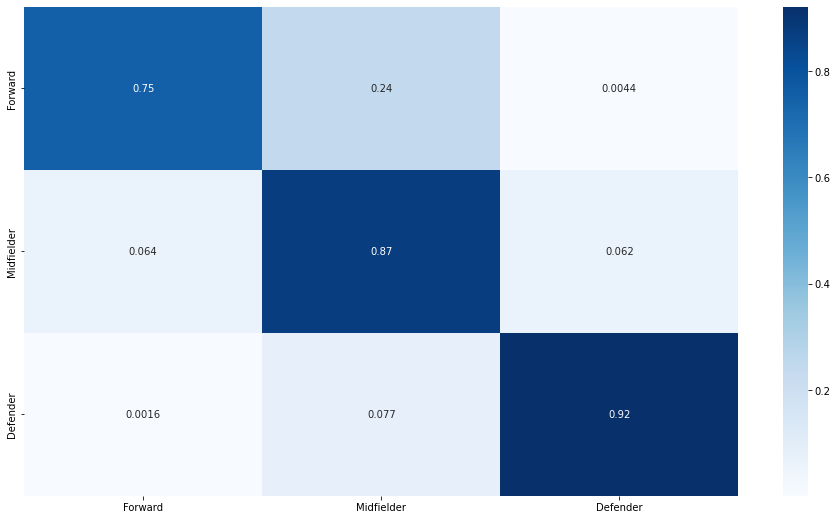

In [51]:
tree(X_train, X_test, y_train, y_test, pos_type_tree)

Best n_neighbors: 21
              precision    recall  f1-score   support

    Defender       0.95      0.94      0.95      1269
     Forward       0.87      0.76      0.81       684
  Midfielder       0.84      0.90      0.87      1419

    accuracy                           0.89      3372
   macro avg       0.89      0.87      0.88      3372
weighted avg       0.89      0.89      0.89      3372


Accuracy score:  0.8876037959667853


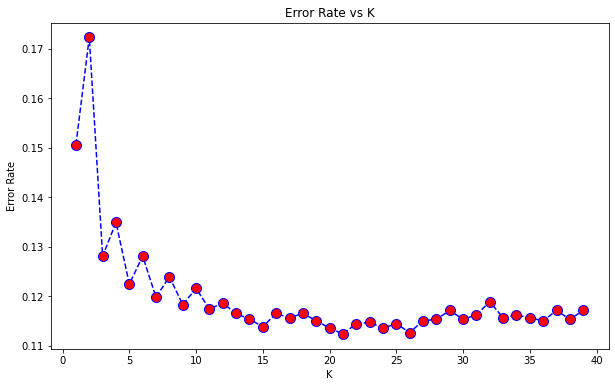

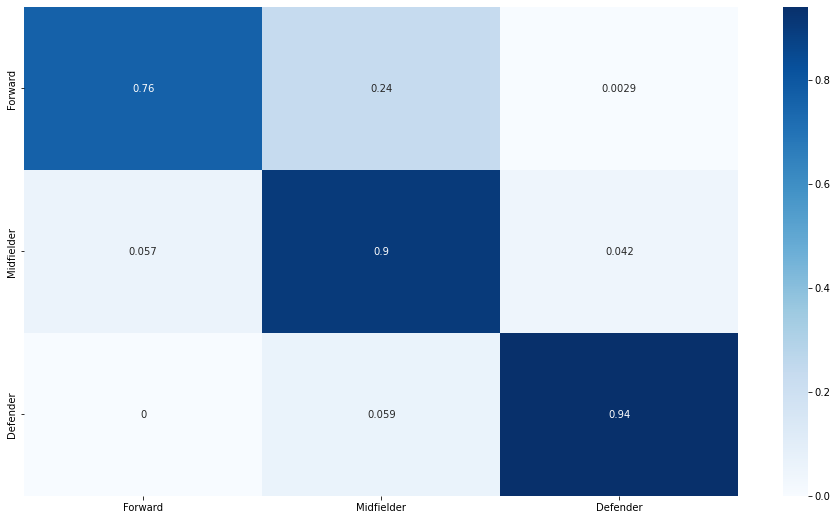

In [52]:
knn(X_train, X_test, y_train, y_test, pos_type_knn)

Checking performance

In [54]:
performance_df = pd.DataFrame({'Attributes_number': ['7_attributes', '35_attributes'],
                               'Tree_7_labels': pos_name_tree,
                               'KNN_7_labels': pos_name_knn,
                               'Tree_3_labels': pos_type_tree,
                               'KNN_3_labels': pos_type_knn
                              })
performance_df

,Attributes_number,Tree_7_labels,KNN_7_labels,Tree_3_labels,KNN_3_labels
0,7_attributes,0.728351,0.761862,0.819098,0.850237
1,35_attributes,0.795077,0.816429,0.866845,0.887604


KNN worked better in all cases than Decisional Tree, we have far more better results with 3 labels than 7, because o lot of wing position have very similar stats. Also some Forward players have similar stats with Midfielders.

# Unsupervised

I will implement K-Means and Hierarchical clustering algorithms for the unsupervised part

Basic group of stats with 3 labels

In [123]:
# K-means & hierarchical clustering
kmeans_list = []
hierar_list =[]

In [124]:
data_cluster_7 = data_player_7.copy()
data_cluster_7

,pace,shooting,passing,dribbling,defending,physic,BMI
0,0.913978,0.989247,0.978495,1.021505,0.408602,0.698925,0.267887
1,0.967391,1.010870,0.880435,0.967391,0.380435,0.836957,0.257992
3,0.857143,1.000000,0.857143,0.934066,0.472527,0.901099,0.259665
4,1.000000,0.934066,0.945055,1.032967,0.395604,0.648352,0.244001
5,0.835165,0.945055,1.021978,0.967033,0.703297,0.857143,0.234801
...,...,...,...,...,...,...,...
18939,1.340426,0.787234,1.063830,1.000000,0.872340,1.063830,0.501418
18940,1.234043,0.489362,0.553191,0.574468,1.063830,1.021277,0.475394
18941,1.085106,0.531915,0.617021,0.765957,0.957447,1.170213,0.460035
18942,1.297872,0.744681,1.021277,1.021277,0.936170,1.234043,0.492001


In [127]:
def kmeans(data_cluster):
    clusters_nr = 3
    X = np.array(data_cluster)
    KMeans_cluster = KMeans(n_clusters=clusters_nr, n_init=100, random_state=random_state)
    KMeans_cluster.fit(X)

    labels = KMeans_cluster.labels_

    a = labels[0]
    b = labels[4]
    label = []
    for i in labels:
        if i == a:
            label.append("Forward")
        elif i == b:
            label.append("Midfielder")
        else:
            label.append("Defender")


    # assign a player to his cluster group
    data_cluster['cluster_group'] = np.nan
    for i in range(len(X)):
        data_cluster['cluster_group'].iloc[i] = label[i]
        
    data_cluster["real_pos"] = data_player['pos_type']
    data_cluster['check'] = data_cluster['cluster_group'] == data_cluster['real_pos']
    data_cluster['positions'] = data_player['pos_name']

    sns.countplot(data = data_cluster ,x='cluster_group',hue='check')
    plt.figure(figsize=(15,10))
    sns.countplot(data = data_cluster ,x='positions',hue='cluster_group')
    
    acc = data_cluster.check.sum() / len(data_cluster['check']) * 100
    print("Accuracy score for k-means:", acc)
    return acc

In [128]:
def hie(data_cluster):
    X = np.array(data_cluster)
    cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
    cluster.fit_predict(X)
    
    labels = cluster.labels_
    a = labels[0]
    b = labels[4]
    label = []
    for i in labels:
        if i == a:
            label.append("Forward")
        elif i == b:
            label.append("Midfielder")
        else:
            label.append("Defender")

    data_cluster['cluster_group'] = np.nan
    for i in range(len(X)):
        data_cluster['cluster_group'].iloc[i] = label[i]
        
    data_cluster["real_pos"] = data_player['pos_type']
    data_cluster['check'] = data_cluster['cluster_group'] == data_cluster['real_pos']
    data_cluster['positions'] = data_player['pos_name']
    
    sns.countplot(data = data_cluster ,x='cluster_group',hue='check')
    plt.figure(figsize=(15,10))
    sns.countplot(data = data_cluster ,x='positions',hue='cluster_group')
    
    dm = linkage(X, method='ward')
    plt.figure(figsize=(15,8))
    dendr = dendrogram(dm)
    plt.show()
    
    acc = data_cluster.check.sum() / len(data_cluster['check']) * 100
    print("Accuracy score for hierarchical clustering:", acc)
    return acc

Accuracy score for k-means: 68.02491103202847


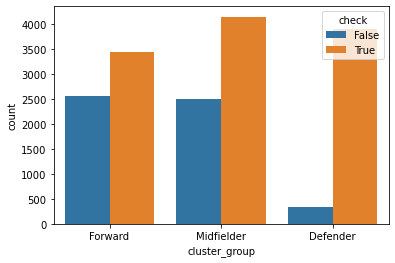

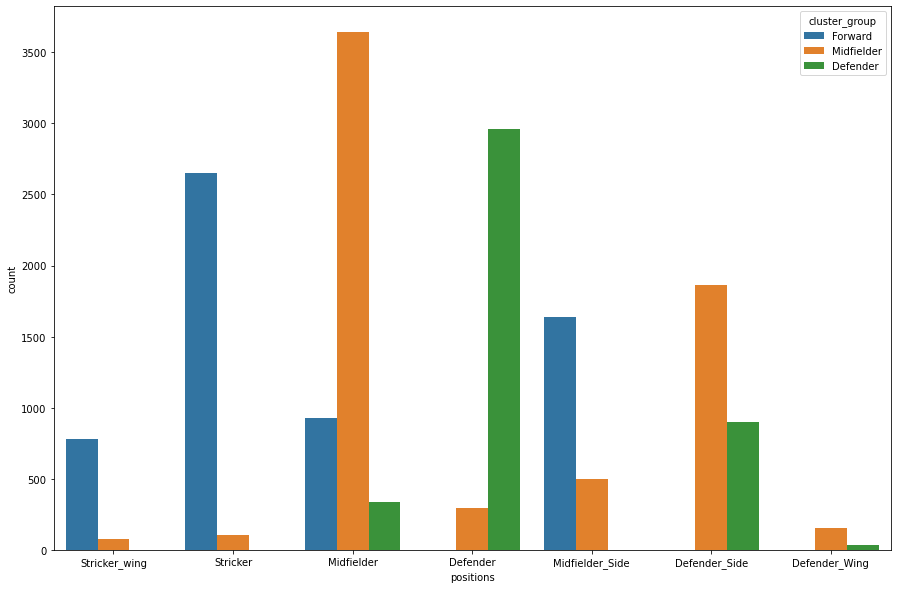

In [129]:
kmeans_list.append(kmeans(data_cluster_7))

In [130]:
data_player_7_her = data_player_7.copy()

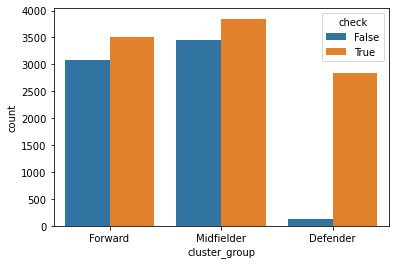

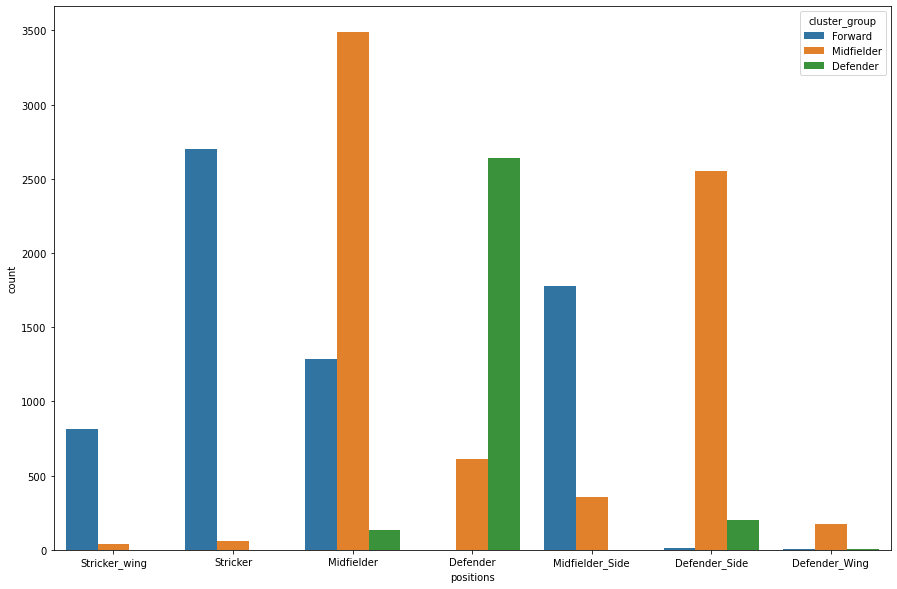

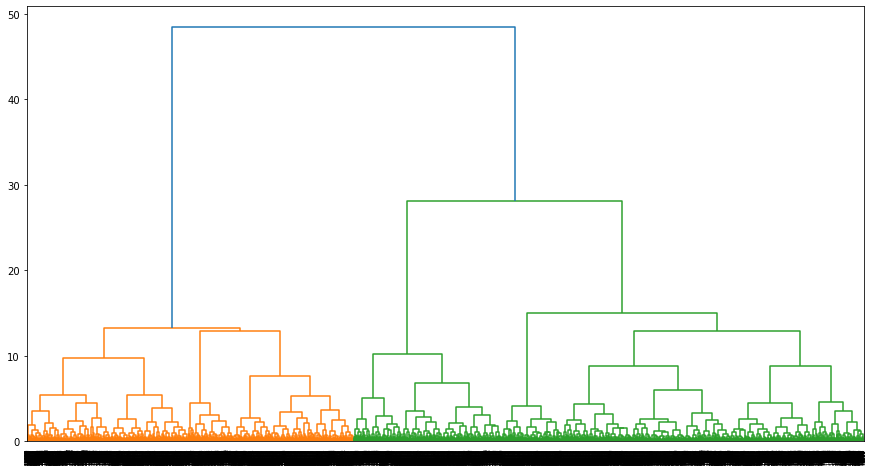

Accuracy score for hierarchical clustering: 60.55753262158956


In [131]:
hierar_list.append(hie(data_player_7_her))

Large group of stats with 3 labels

In [132]:
data_cluster_35 = data_player_35.copy()
data_player_35_her = data_player_35.copy()

Accuracy score for k-means: 70.13641755634639


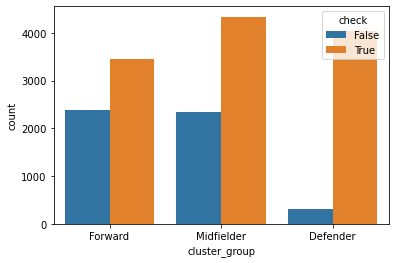

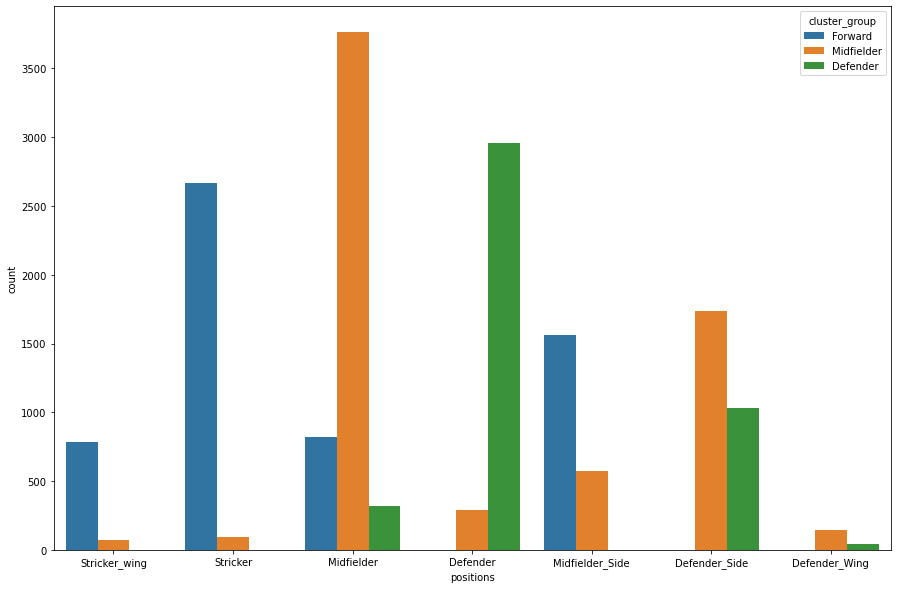

In [133]:
kmeans_list.append(kmeans(data_cluster_35))

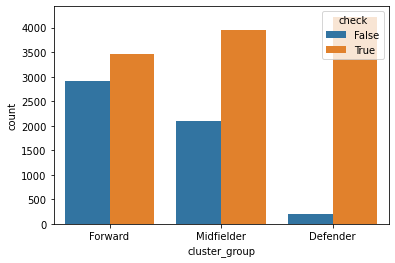

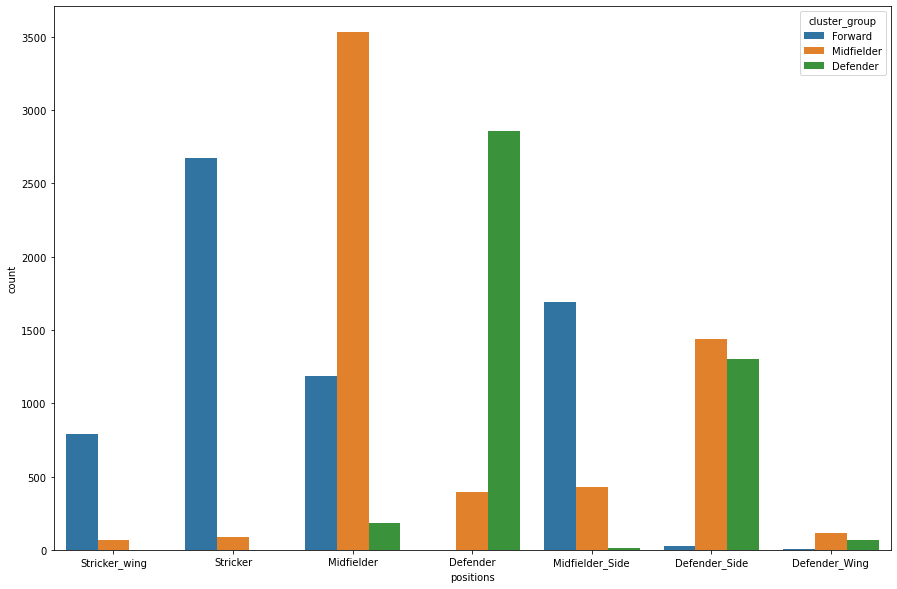

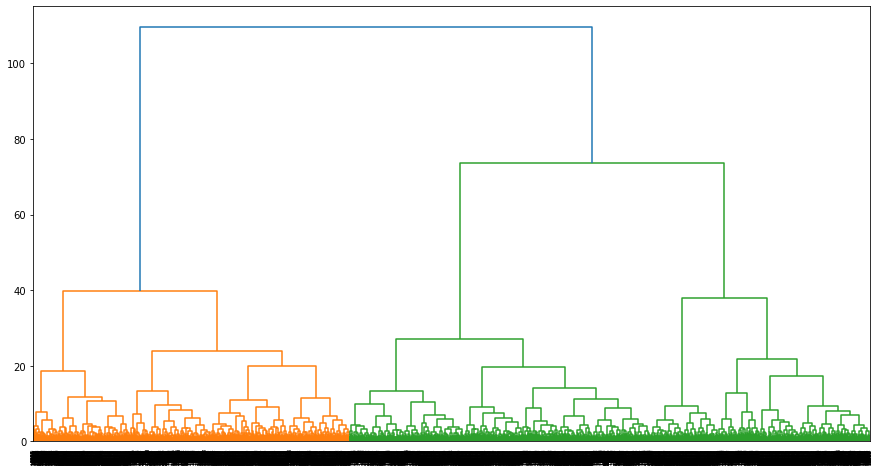

Accuracy score for hierarchical clustering: 69.08659549228943


In [134]:
hierar_list.append(hie(data_player_35_her))

In [135]:
performance_df = pd.DataFrame({'Attributes_number': ['7_attributes', '35_attributes'],
                               'K-means': kmeans_list,
                               'Hierarchical': hierar_list,

                              })
performance_df

,Attributes_number,K-means,Hierarchical
0,7_attributes,68.024911,60.557533
1,35_attributes,70.136418,69.086595
